# ML Lab
## S SHYAM SUNDARAM
## 19BCE1560

# Multiple Linear Regression (with gradient descent)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
from sklearn.datasets import load_diabetes

In [34]:
data = pd.read_csv("forestfires.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [35]:
from sklearn import preprocessing
enc=preprocessing.LabelEncoder()
enc.fit(data['month'])
data['month']=enc.transform(data['month'])
enc.fit(data['day'])
data['day']=enc.transform(data['day'])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


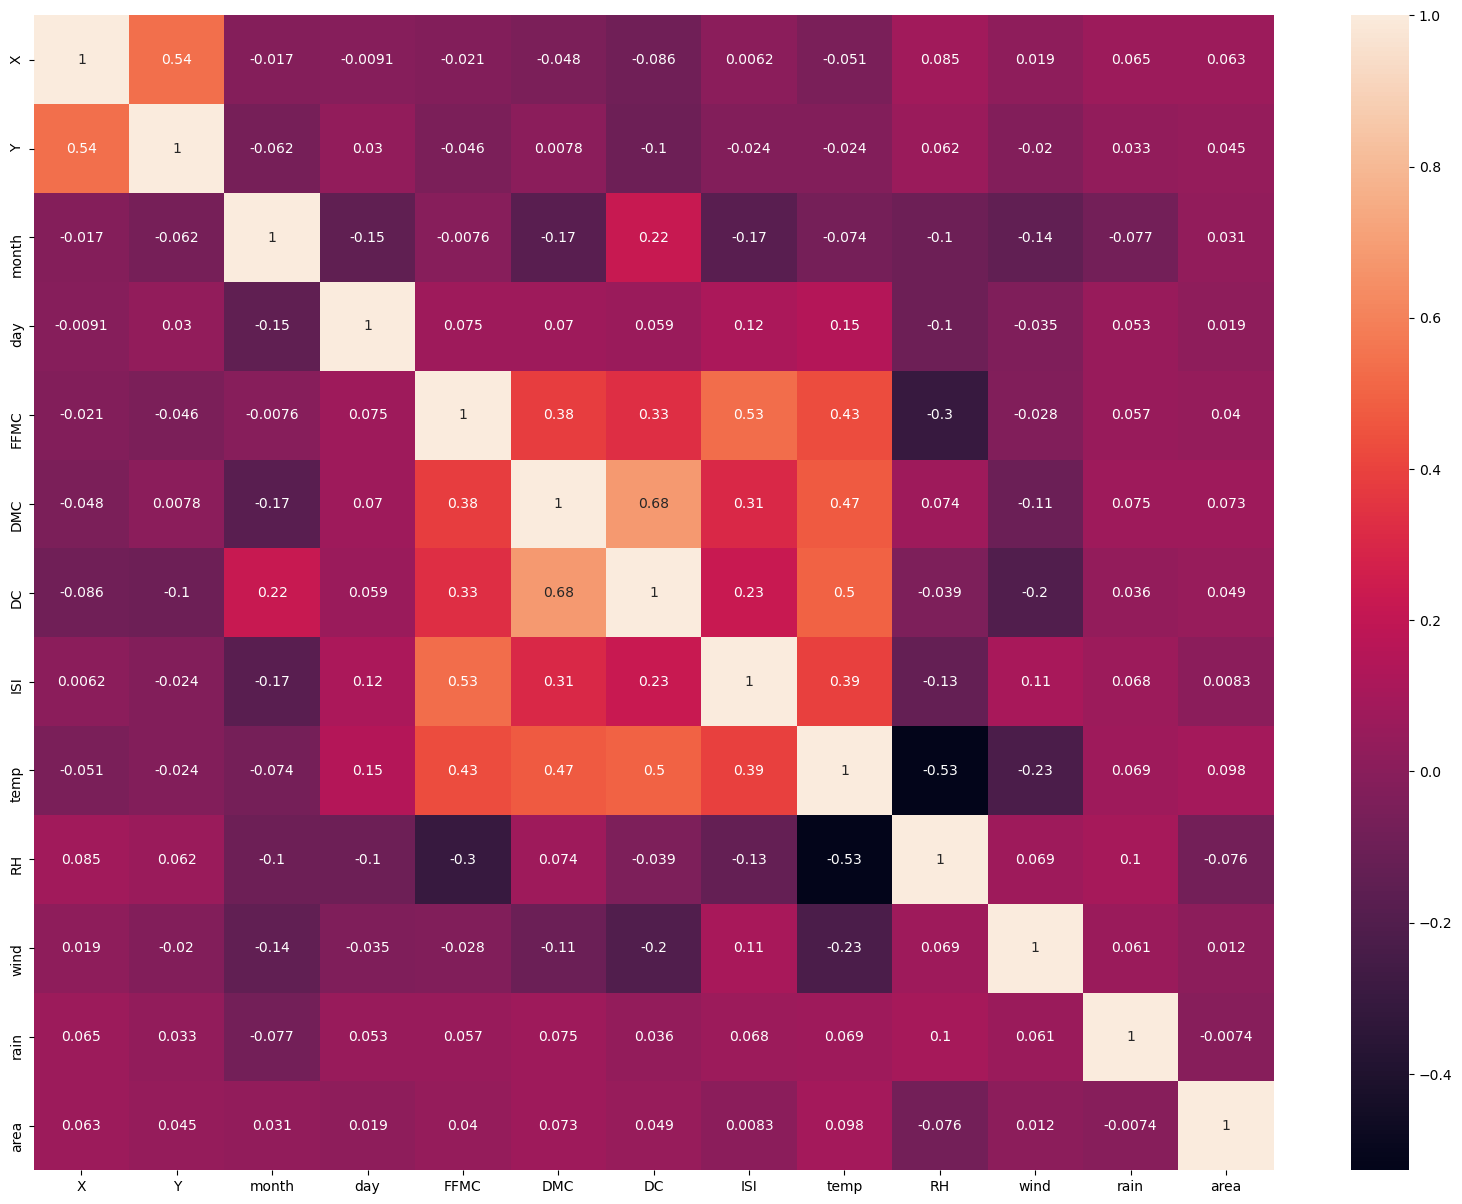

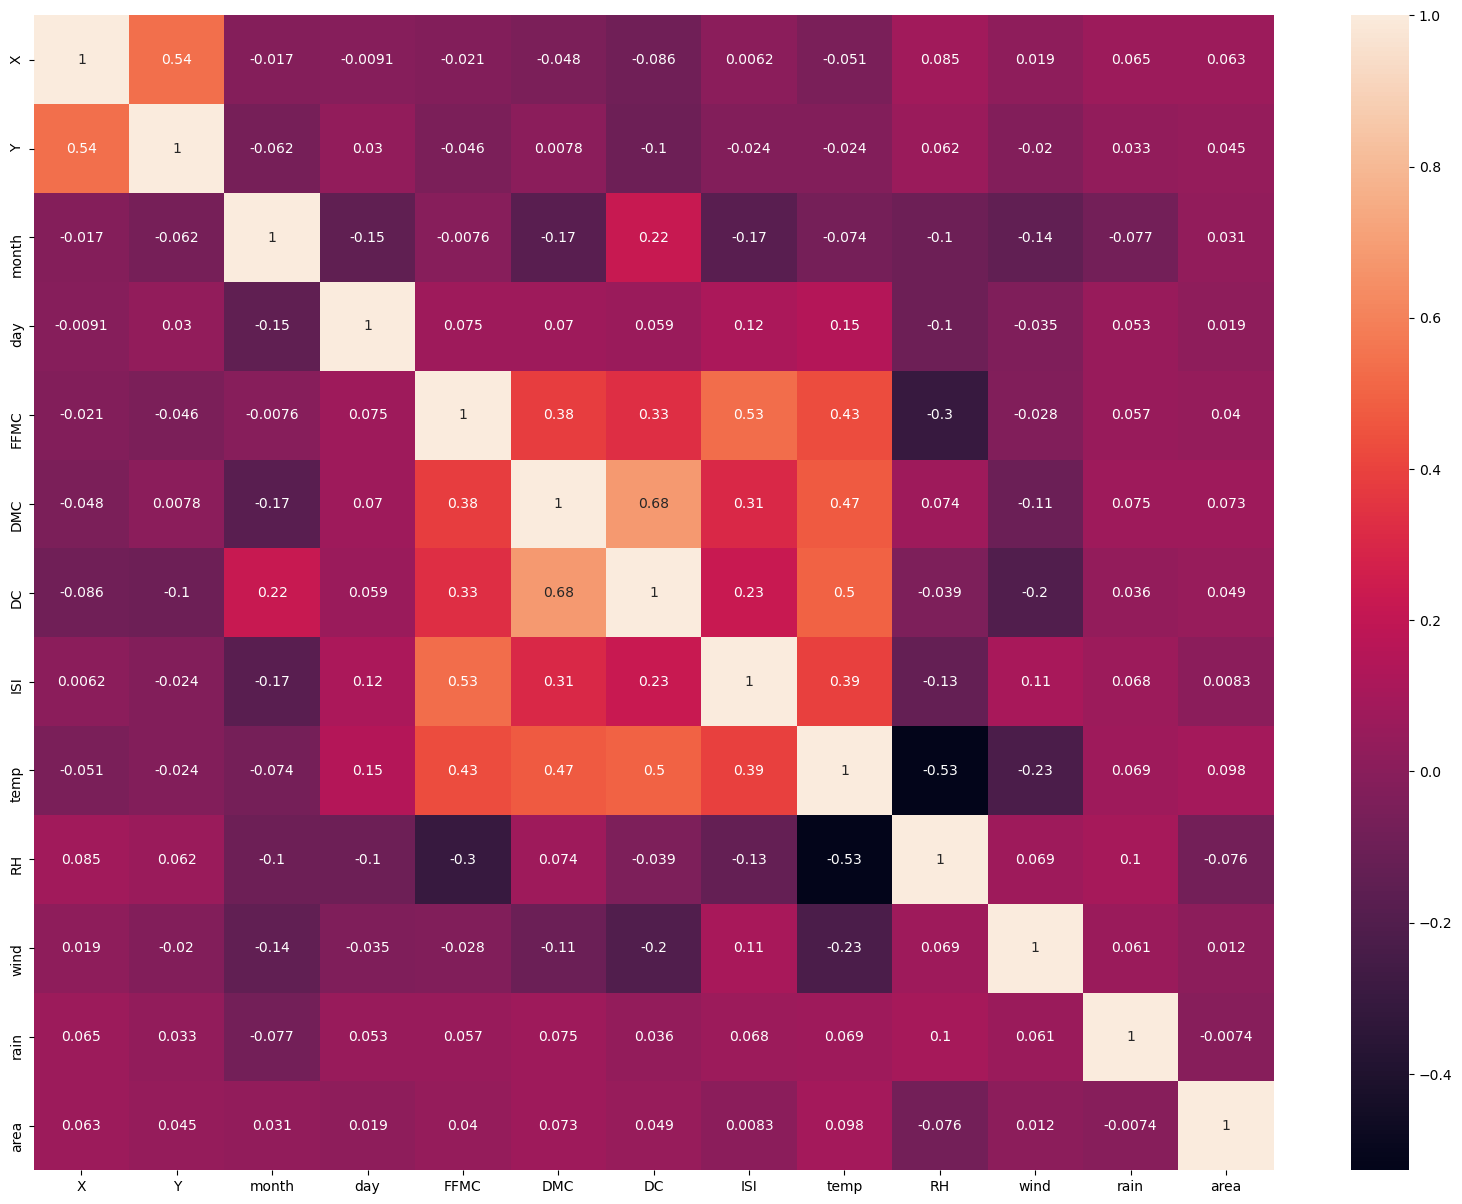

In [40]:
plt.subplots(figsize=(20,15))
sb.heatmap(data.corr(),annot=True)
plt.show()

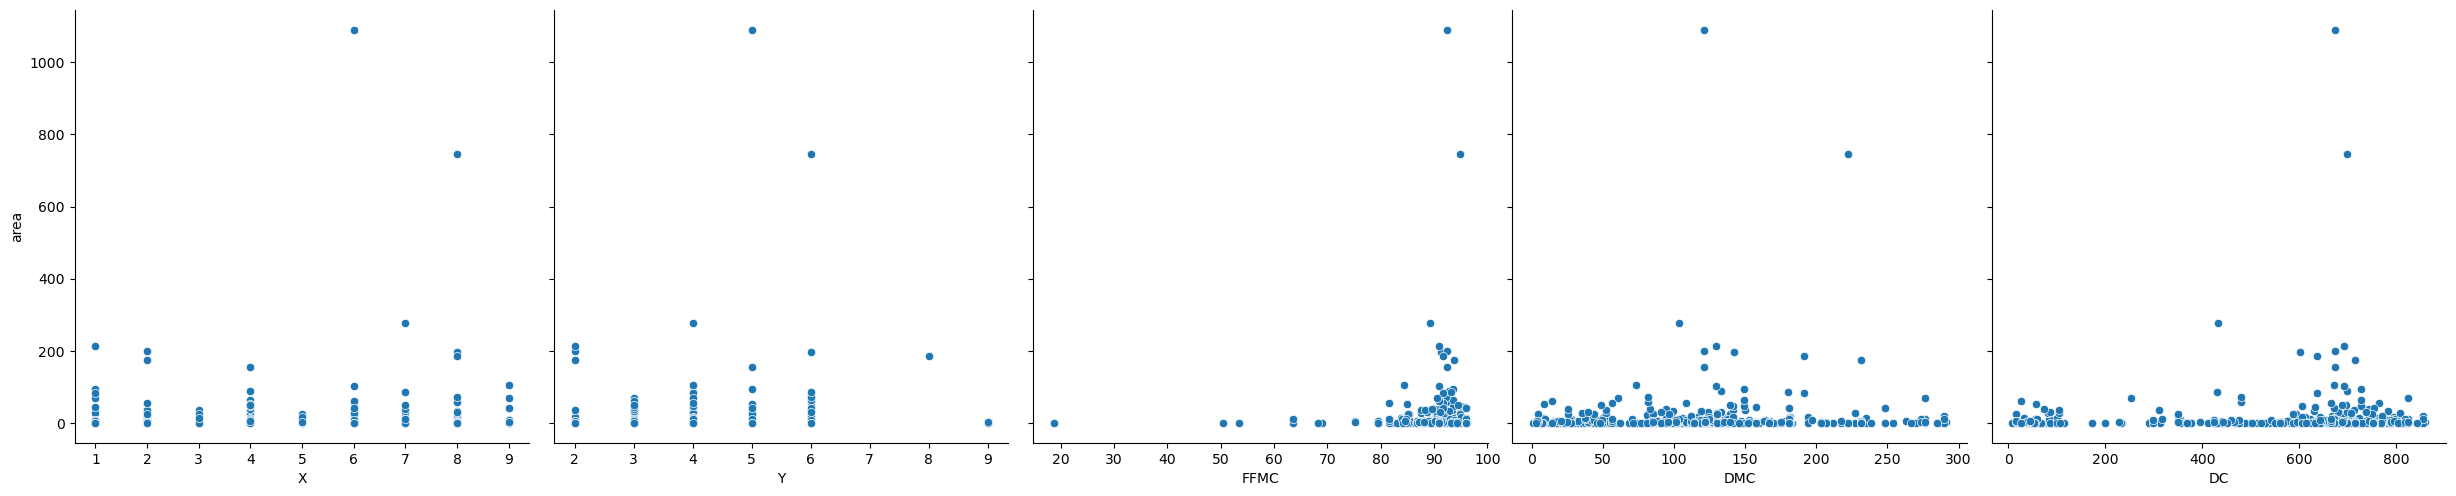

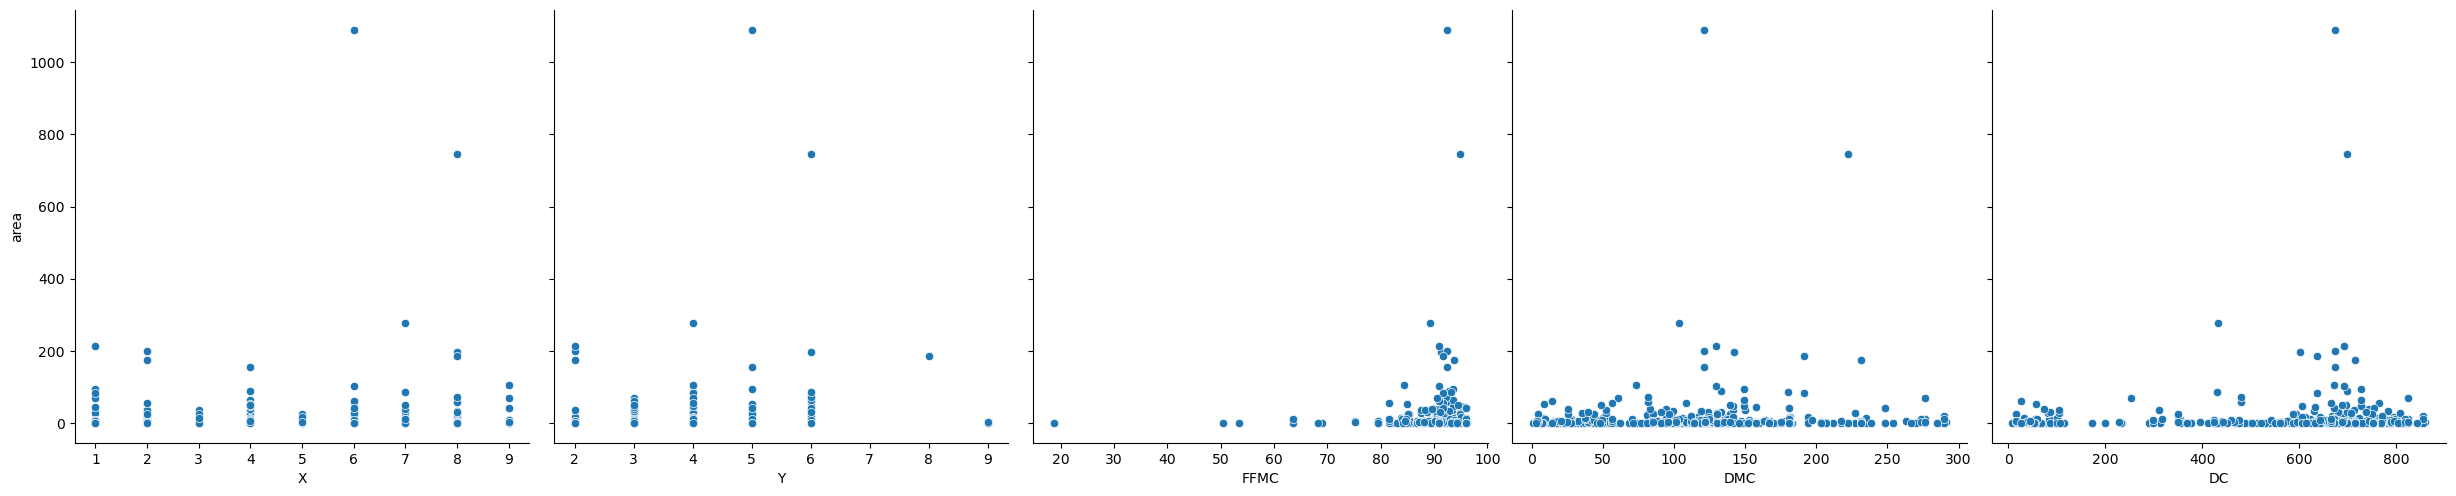

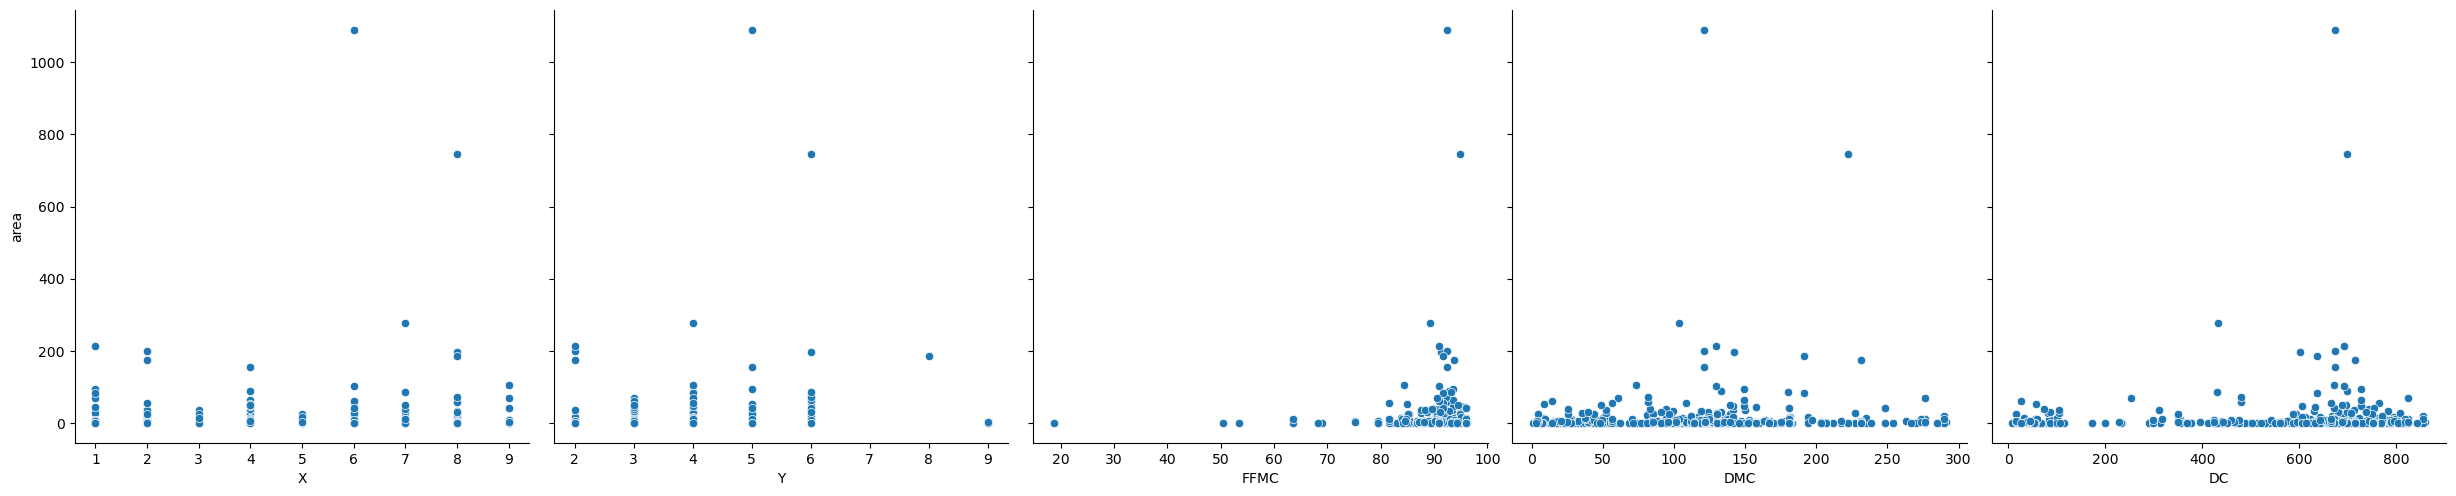

In [52]:
sb.pairplot(data,x_vars=["X","Y","FFMC","DMC","DC"],y_vars=["area"],height=5)
plt.show()

In [41]:
data2=data.values
X=(data2[:,0:12])
y=data2[:,12]
X.shape

(517, 12)

In [42]:
y.shape

(517,)

In [43]:
minmax=preprocessing.MinMaxScaler()
X=minmax.fit_transform(X)
X

array([[0.75      , 0.42857143, 0.63636364, ..., 0.42352941, 0.7       ,
        0.        ],
       [0.75      , 0.28571429, 0.90909091, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.75      , 0.28571429, 0.90909091, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.75      , 0.28571429, 0.09090909, ..., 0.64705882, 0.7       ,
        0.        ],
       [0.        , 0.28571429, 0.09090909, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.625     , 0.14285714, 0.81818182, ..., 0.18823529, 0.45555556,
        0.        ]])

In [44]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.30, random_state=42)

In [47]:
class Regression:
    def __init__(self, alpha=0.01, n_iterations=10000):
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for i in range(self.n_iterations):
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            
            dw = (1 / X.shape[0]) * (2 * np.dot(X.transpose(), (y_hat - y)))
            dp = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            
            self.weights -= self.alpha * dw
            self.bias -= self.alpha * dp
        
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [48]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Regression()
model.fit(train_x,train_y)
preds = model.predict(test_x)

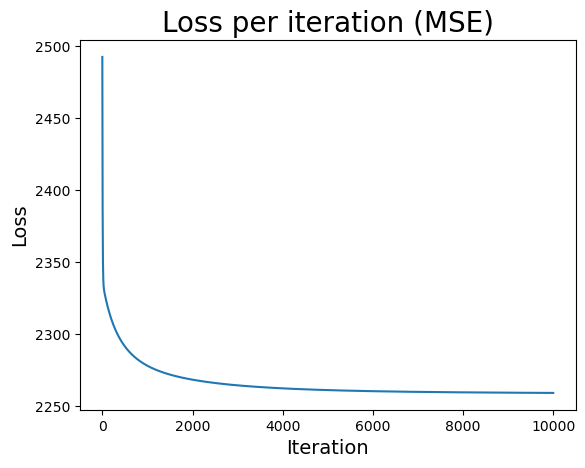

In [49]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys)
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, preds))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, preds))

Mean Absolute Error: 20.84029777857824
Mean Squared Error: 7918.382827244626


In [60]:
var = np.dot(train_x.T,train_x)
var = np.linalg.inv(var)
var = np.dot(var,train_x.T)
var = np.dot(var,train_y)
coefs = var
coefs

array([ 20.45258188,  -2.21910903,   2.65952524,   2.95973479,
       -13.14331642,  36.8678168 , -12.69554129, -11.72197132,
        18.44842388, -13.82849243,   8.41994432, -20.7501324 ])

In [64]:
train_x

array([[0.625     , 0.14285714, 1.        , ..., 0.15294118, 0.15555556,
        0.        ],
       [0.625     , 0.42857143, 1.        , ..., 0.37647059, 0.5       ,
        0.        ],
       [0.75      , 0.28571429, 0.09090909, ..., 0.32941176, 0.6       ,
        0.        ],
       ...,
       [0.125     , 0.        , 0.09090909, ..., 0.48235294, 0.3       ,
        0.        ],
       [0.125     , 0.42857143, 0.45454545, ..., 0.42352941, 0.15555556,
        0.        ],
       [0.125     , 0.28571429, 0.09090909, ..., 0.29411765, 0.4       ,
        0.        ]])

# Decision tree